# Credit Card Fraud Prediction

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy
import time

from pylab import rcParams
rcParams['figure.figsize'] = 16, 6

from sklearn import preprocessing
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from yellowbrick.classifier import ROCAUC, roc_auc
from yellowbrick.features import RadViz
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

RANDOM_SEED = 101
LABELS = ['Normal', 'Fraud']

In [2]:
# Import the Dataset
data = pd.read_csv('CreditCard.csv', sep = ',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

# Step 1: Check for Missing Values

In [3]:
# Step 1: Check for Missing Values

data.isnull().sum()
data.isnull().any()

# Insights: No missing Values

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

# Step 2: Encoding

In [4]:
# Step 2: Encoding
# a) Label Encoder: Char to Number
# b) One Hot Encoder: Split data into variables basis binary value
# c) Dummy Variables: To avoid Multicollinearity Problem

data.info()

# Since there is no CHAR variable, so no need to do encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Step 3: Outlier Treatment

In [5]:
# Step 3: Outlier Treatment

# Since it is a classification problem and most of the variable values fall within a very small range, 
# Outlier treatment is not required
# Fraudulent Transactions are in fact outliers in Anomaly Detection problems. So we can't remove them

# Step 4: Feature Scaling / Standardization

In [6]:
# Step 4: Feature Scaling / Standardization

# Not required as we are not applying any distance based model here

# Step 5: Check Imbalance Dataset

In [7]:
# Step 5: Check Imbalance Dataset

data['Class'].value_counts()

# Data is imbalanced as number of '0' > number of '1'
# If Majority >= 2*Minority, then it's Imbalanced Dataset

# Possible Approaches: Oversampling, Undersampling, SMOTE, Class Weight.
# Prefer Oversampling as it always targets the minority class and adds more weights to it while undersampling does the opposite

# We will not apply any treatment here as Percentage of Frauds in Banking Sector is less than 2%. So It's domain specific
# Oversampling is mainly used in retail sector

0    284315
1       492
Name: Class, dtype: int64

# EDA - Exploratory Data Analysis

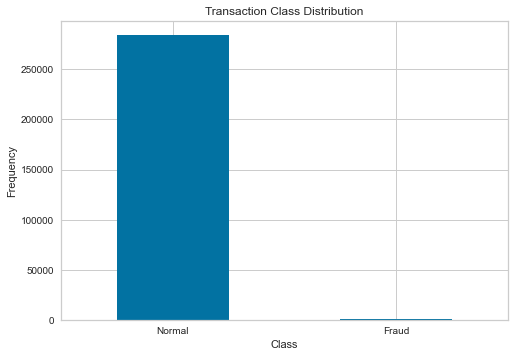

In [8]:
# Frequency of each class in Target Variable
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [9]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

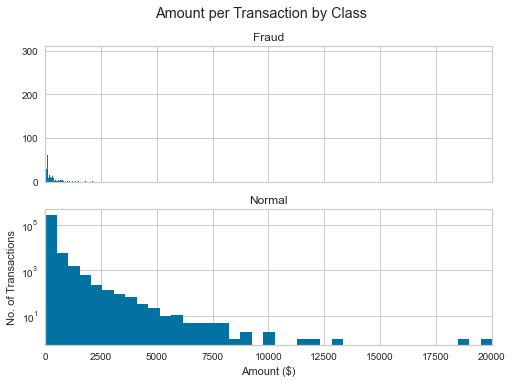

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle("Amount per Transaction by Class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transactions")

plt.xlim(0, 20000)
plt.yscale('log')

plt.show()

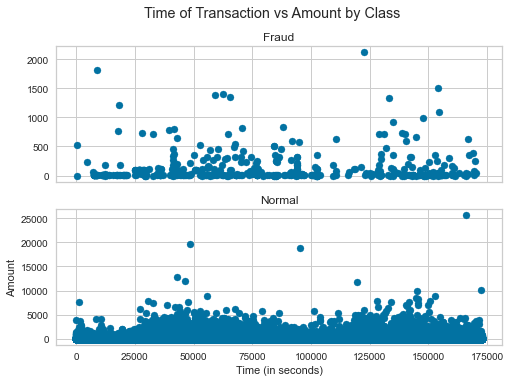

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle("Time of Transaction vs Amount by Class")
bins = 50
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel("Time (in seconds)")
plt.ylabel("Amount")

plt.show()

<AxesSubplot:xlabel='Time', ylabel='Density'>

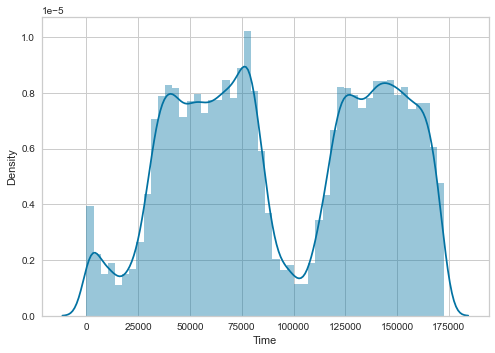

In [14]:
sns.distplot(data['Time'])

In [15]:
# Taking 10% data only for building the model due to time constraints. Set the percentage in parameter 'frac'
data1 = data.sample(frac = 0.1, random_state = 42)
data1.shape

(28481, 31)

In [16]:
data1.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0


In [17]:
fraud = data1[data1['Class'] == 1]
valid = data1[data1['Class'] == 0]

In [18]:
print(fraud.shape)
print(valid.shape)

(46, 31)
(28435, 31)


In [19]:
outlier_fraction = len(fraud)/float(len(valid))
outlier_fraction

0.001617724635132759

# Correlation Check

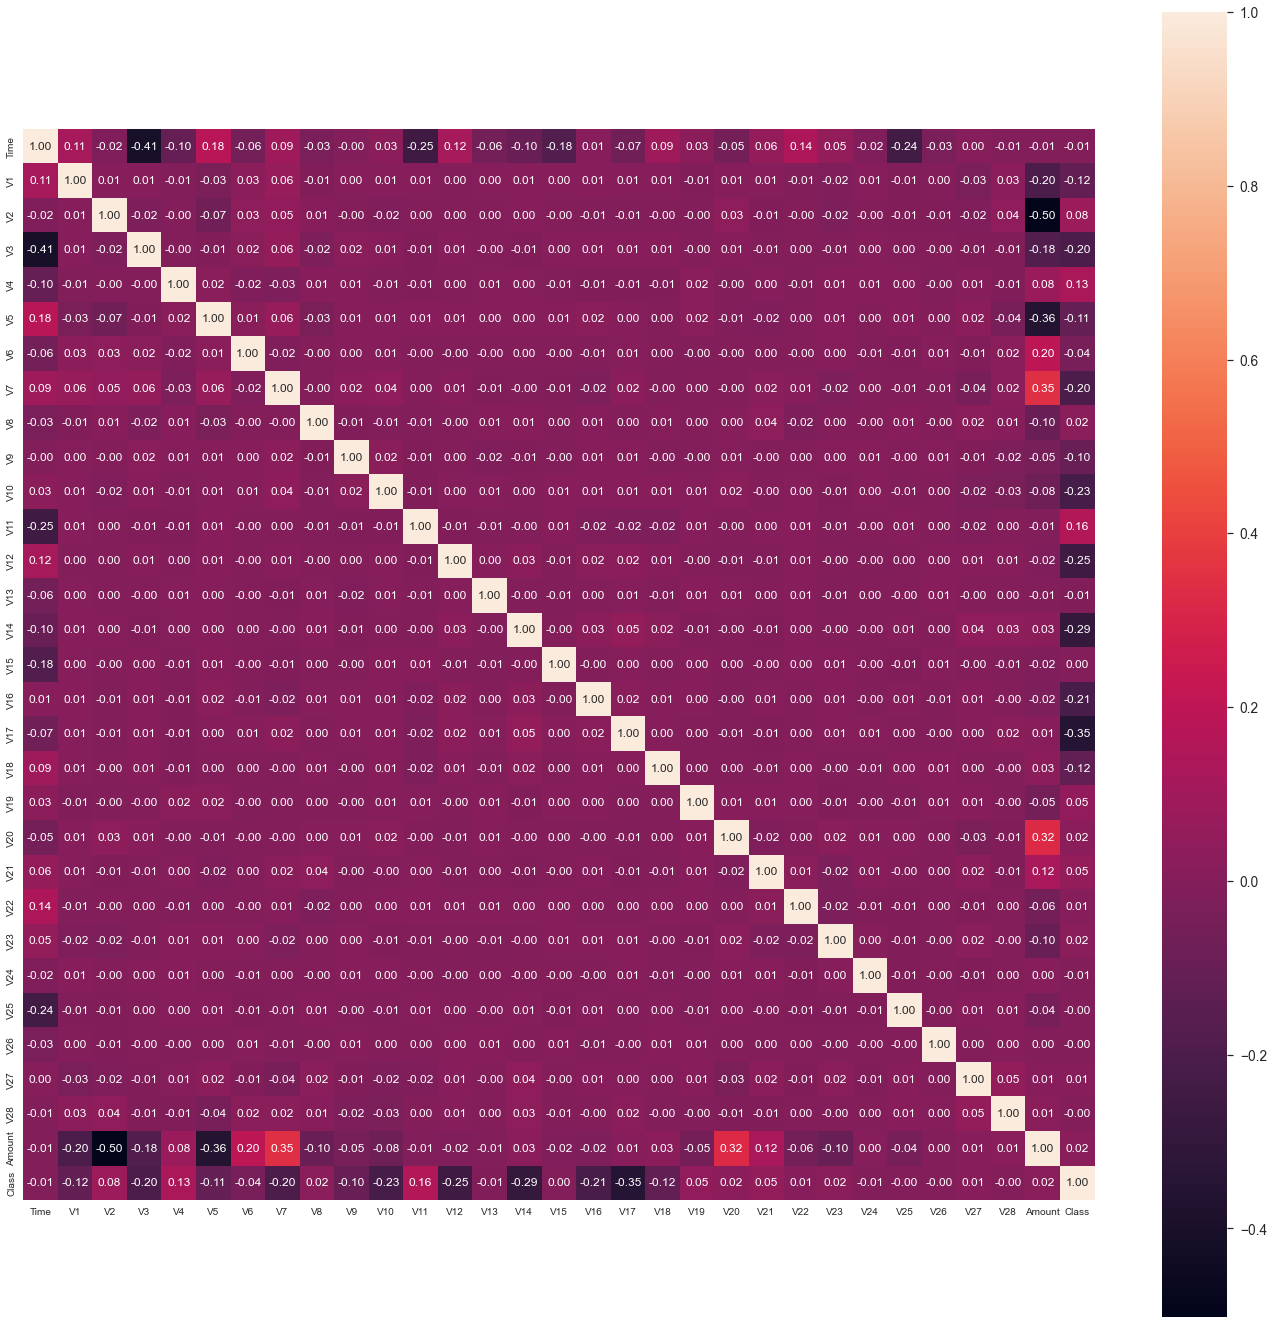

In [20]:
# Create Correlation Matrix
corrmat = data1.corr()
cols = corrmat.columns

# Correlation Matrix
cm = np.corrcoef(data1[cols].values.T)
f, ax = plt.subplots(figsize=(24,24))
sns.set(font_scale=1.25)

# Plot the Heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=cols.values, xticklabels=cols.values)

In [21]:
columns = data1.columns.tolist()

# Train Test Split

In [22]:
# Split the data into target and feature variables
columns = [c for c in columns if c not in ['Class']]
target  = 'Class'
state = np.random.RandomState(101)
x = data1[columns]
y = data1[target]
x_outlier = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size  = 0.2, random_state = 110)

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# Model Building

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# 1) Logistic Regression

In [24]:
# Model Initialization
fit_log = LogisticRegression()
fit_log.fit(x_train, y_train)

LogisticRegression()

In [25]:
# Predictions
y_pred_lr_train = fit_log.predict(x_train)
y_pred_lr_test = fit_log.predict(x_test)

In [26]:
# Training & Testing Score
print(accuracy_score(y_train, y_pred_lr_train))
print(accuracy_score(y_test, y_pred_lr_test))

0.9986832865168539
0.9987712831314727


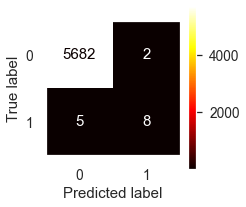

In [27]:
# Confusion Matrix
# print(confusion_matrix(y_test, y_pred_lr_test))  
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(fit_log, x_test, y_test, cmap='hot', normalize=None, ax=ax)
plt.grid(False)

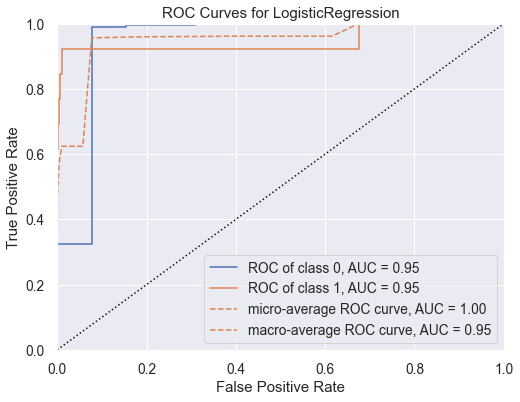

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [28]:
# Area Under Curve
fig, ax = plt.subplots(figsize=(8,6))
visualizer = ROCAUC(fit_log, ax)
visualizer.fit(x_train, y_train)                 # Fit the training data to the visualizer
auc_dt = visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                                # Finalize and render the figure

In [29]:
print(classification_report(y_test, y_pred_lr_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5684
           1       0.80      0.62      0.70        13

    accuracy                           1.00      5697
   macro avg       0.90      0.81      0.85      5697
weighted avg       1.00      1.00      1.00      5697



# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# 2) Decision Tree

In [30]:
# Model Initialization
fit_dt = DecisionTreeClassifier()

In [31]:
# # Hyperparameter Optimization using GridSearchCV
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Automatically find the best parameters instead of manual hit and try

# np.random.seed(42)
# start = time.time()

# param_dist = {'max_depth': [6, 8, 10, 12, 14, 16],
#               'max_features': ['auto', None],
#               'criterion': ['entropy'],
#               'min_samples_split' : [3, 5, 7, 9, 11, 13],
#               'min_samples_leaf' : [2, 3, 4, 6, 8, 10, 12],
#               'max_leaf_nodes' : [80, 90, 100, 110, 120, 130]}

# # n_jobs should be 1 less than number of CPU cores. -1 means all cores
# cv_dt = GridSearchCV(fit_dt, cv = 5, param_grid=param_dist, n_jobs = -1)                 

# cv_dt.fit(x_train, y_train)
# print('Best Parameters using grid search: \n', cv_dt.best_params_)
# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))

In [32]:
# Set best parameters given by grid search CV
fit_dt.set_params(max_depth=8, 
                  criterion="entropy", 
                  min_samples_split=3, 
                  min_samples_leaf=2 ,
                  max_features = 'auto',
                  max_leaf_nodes = 8)

fit_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=8, min_samples_leaf=2,
                       min_samples_split=3)

In [33]:
# Predictions
y_pred_dt_train = fit_dt.predict(x_train)
y_pred_dt_test = fit_dt.predict(x_test)

In [34]:
# Training & Testing Score
print(accuracy_score(y_train, y_pred_dt_train))
print(accuracy_score(y_test, y_pred_dt_test))

0.9992099719101124
0.9992978760751272


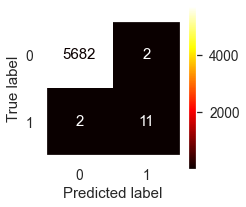

In [35]:
# Confusion Matrix
# print(confusion_matrix(y_test, y_pred_dt_test))  
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(fit_dt, x_test, y_test, cmap='hot', normalize=None, ax=ax)
plt.grid(False)

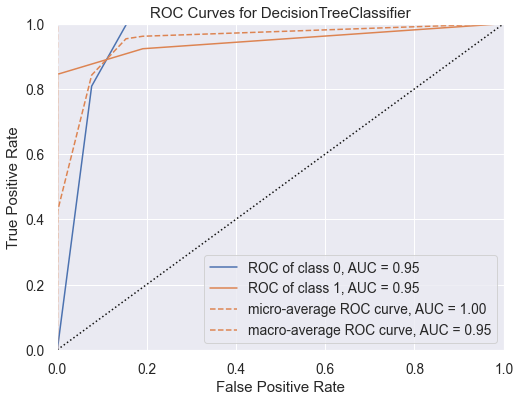

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
# Area Under Curve
fig, ax = plt.subplots(figsize=(8, 6))
visualizer = ROCAUC(fit_dt, ax)
visualizer.fit(x_train, y_train)                 # Fit the training data to the visualizer
auc_dt = visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                                # Finalize and render the figure

In [37]:
print(classification_report(y_test, y_pred_dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5684
           1       0.85      0.85      0.85        13

    accuracy                           1.00      5697
   macro avg       0.92      0.92      0.92      5697
weighted avg       1.00      1.00      1.00      5697



# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# 3) Random Forest Classifier

In [38]:
# Model Initialization
fit_rf = RandomForestClassifier()
fit_rf.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
# # Hyperparameter Optimization using GridSearchCV
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Automatically find the best parameters instead of manual hit and try

# np.random.seed(42)
# start = time.time()

# param_dist = {'max_depth': [6,8,10,12,14],
#               'bootstrap': [True, False],
#               'max_features': ['auto', None],
#               'criterion': ['gini', 'entropy'],
#               'min_samples_split' : [3, 6, 10, 15, 30],
#               'min_samples_leaf' : [2, 4, 6, 8]}

# # Here we can add 'n_estimator' : [400, 500, 600...], 'min_samples_split' : [5, 10, 15, 20, 30], 
# # 'min_samples_leaf' : [2, 3, 4, 5, 7] but that will consume lot of resources and increase computational time
# # Hence calculate OOB Error Rate and manually put the n_estimator value later

# cv_rf = GridSearchCV(fit_rf, cv = 5,
#                      param_grid=param_dist, 
#                      n_jobs = -1)                 # n_jobs should be 1 less than number of CPU cores. -1 means all cores

# cv_rf.fit(x_train, y_train)
# print('Best Parameters using grid search: \n', cv_rf.best_params_)
# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))

In [40]:
# Set best parameters given by grid search 
fit_rf.set_params(max_depth=8, 
                  criterion="entropy", 
                  min_samples_split=3, 
                  min_samples_leaf=2, 
                  max_features = 'auto')

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3)

In [41]:
# # OOB (Out of Bag) Error Rate

# fit_rf.set_params(warm_start=True, oob_score=True)
 
# min_estimators = 100
# max_estimators = 500

# error_rate = {}

# for i in range(min_estimators, max_estimators + 1):
#     fit_rf.set_params(n_estimators=i)
#     fit_rf.fit(x_train, y_train)

#     oob_error = 1 - fit_rf.oob_score_
#     error_rate[i] = oob_error
    
# # Convert dictionary to a pandas series for easy plotting 
# oob_series = pd.Series(error_rate)

# fig, ax = plt.subplots(figsize=(10, 10))

# ax.set_facecolor('#fafafa')

# oob_series.plot(kind='line',color = 'red')
# plt.xlabel('n_estimators')
# plt.ylabel('OOB Error Rate')
# plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1500 trees)')

In [42]:
# print('OOB Error rate for 650 trees is: {0:.5f}'.format(oob_series[500]))

In [43]:
# Refine the tree via OOB Output for n_estimators
# n_estimators is the number of trees we want to build before taking the maximum voting or averages of predictions

fit_rf.set_params(n_estimators=500,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=500)

In [44]:
# Predictions
y_pred_rf_train = fit_rf.predict(x_train)
y_pred_rf_test = fit_rf.predict(x_test)

In [45]:
# Training & Testing Score
print(accuracy_score(y_train, y_pred_rf_train))
print(accuracy_score(y_test, y_pred_rf_test))

1.0
0.9987712831314727


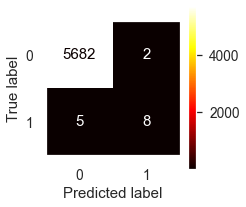

In [46]:
# Confusion Matrix
# print(confusion_matrix(y_test, y_pred_rf_test)) 
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(fit_rf, x_test, y_test, cmap='hot', normalize=None, ax=ax)
plt.grid(False)

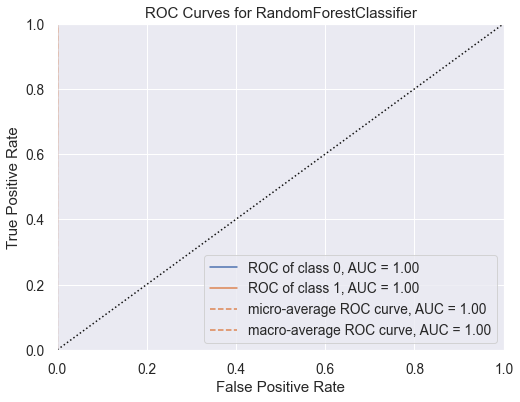

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [47]:
# Area Under Curve
fig, ax = plt.subplots(figsize=(8, 6))
visualizer = ROCAUC(fit_rf, ax)
visualizer.fit(x_train, y_train)                 # Fit the training data to the visualizer
auc_dt = visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                                # Finalize and render the figure

In [48]:
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5684
           1       0.80      0.62      0.70        13

    accuracy                           1.00      5697
   macro avg       0.90      0.81      0.85      5697
weighted avg       1.00      1.00      1.00      5697



# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# 4) XG Boost Classifier

In [49]:
# Hyperparameter Tuning

In [50]:
# Hyperparameter Optimization using GridSearchCV
# Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# Automatically find the best parameters instead of manual hit and try

# param = {'max_depth':range(3,10,2),
#          'min_child_weight':range(1,6,2),
#          'gamma':[i/10.0 for i in range(0,5)],
#          'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}

# gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 140, min_child_weight = 1, 
#                                                   subsample = 0.8, colsample_bytree = 0.8,
#                                                   objective= 'binary:logistic', nthread = -1, scale_pos_weight = 1, seed = 27), 
#                                                   param_grid = param, scoring = 'recall', n_jobs=-1, cv = 5)

# gsearch1.fit(x_train, y_train)

In [51]:
# print('Best Parameters using grid search: \n', gsearch1.best_params_)

In [52]:
# Model Initialization with Tuned Hyperparameters
fit_xgb = XGBClassifier(gamma = 0.01, max_depth = 10, min_child_weight = 3, reg_alpha = 0.01, n_estimators = 140)
fit_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.01, reg_lambda=1, ...)

In [53]:
# Predictions
y_pred_xgb_train = fit_xgb.predict(x_train)
y_pred_xgb_test = fit_xgb.predict(x_test)

In [54]:
# Training & Testing Score
print(accuracy_score(y_train, y_pred_xgb_train))
print(accuracy_score(y_test, y_pred_xgb_test))

0.9999561095505618
0.9994734070563455


In [85]:
# Performance Metrics
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb_test)
Precision_xgb = metrics.precision_score(y_test, y_pred_xgb_test)
recall_xgb = metrics.recall_score(y_test, y_pred_xgb_test)

print("Accuracy:",accuracy_xgb)
print("Precision (Weighted Average):",Precision_xgb)
print("Recall (Weighted Average):",recall_xgb)

Accuracy: 0.9994734070563455
Precision (Weighted Average): 1.0
Recall (Weighted Average): 0.7692307692307693


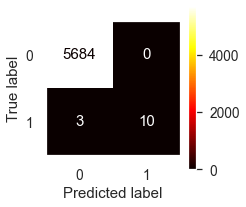

In [56]:
# Confusion Matrix
# print(confusion_matrix(y_test, y_pred_xgb_test)) 
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(fit_xgb, x_test, y_test, cmap='hot', normalize=None, ax=ax)
plt.grid(False)

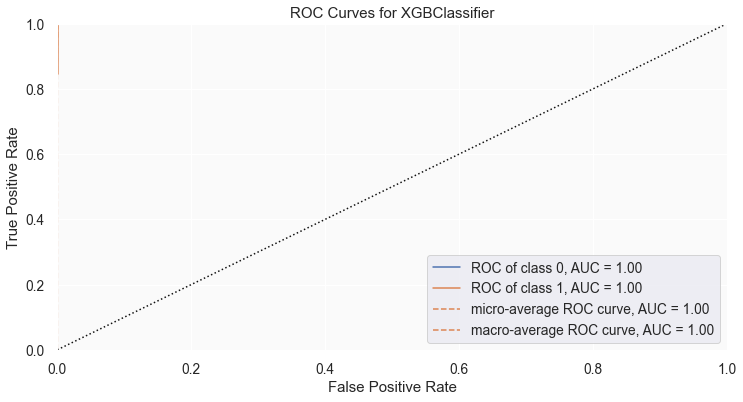

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
# Area Under Curve
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('#fafafa')

visualizer = ROCAUC(fit_xgb, ax)

visualizer.fit(x_train, y_train)                 # Fit the training data to the visualizer
auc_dt = visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                                # Finalize and render the figure

In [58]:
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5684
           1       1.00      0.77      0.87        13

    accuracy                           1.00      5697
   macro avg       1.00      0.88      0.93      5697
weighted avg       1.00      1.00      1.00      5697



# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# 5) Stacking Classifier

In [59]:
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

3-Fold Cross Validation :

KNN
------------------------------------------------
Accuracy  : 1.00 (+/- 0.00)
Precision : 0.00 (+/- 0.00)
Recall    : 0.00 (+/- 0.00)
F1 Score  : 0.00 (+/- 0.00)
------------------------------------------------

Naive Bayes
------------------------------------------------
Accuracy  : 0.99 (+/- 0.00)
Precision : 0.11 (+/- 0.01)
Recall    : 0.63 (+/- 0.10)
F1 Score  : 0.19 (+/- 0.01)
------------------------------------------------

Logistic Regression
------------------------------------------------
Accuracy  : 1.00 (+/- 0.00)
Precision : 0.60 (+/- 0.15)
Recall    : 0.55 (+/- 0.23)
F1 Score  : 0.57 (+/- 0.19)
------------------------------------------------

Decision Tree
------------------------------------------------
Accuracy  : 1.00 (+/- 0.00)
Precision : 0.72 (+/- 0.07)
Recall    : 0.70 (+/- 0.12)
F1 Score  : 0.71 (+/- 0.09)
------------------------------------------------

Stacking Classifier
------------------------------------------------
Accuracy  

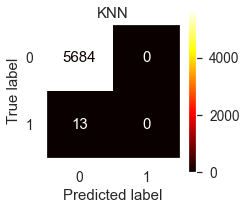

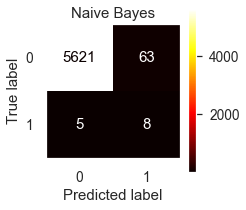

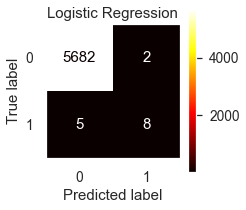

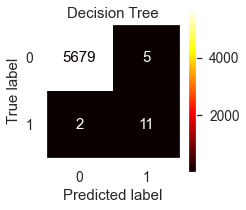

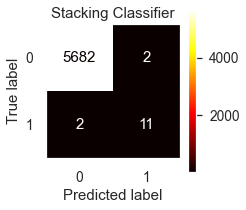

In [81]:
# Initialize the models to be used in Stacking Classifier:
clf1 = KNeighborsClassifier(n_neighbors = 5)
clf2 = GaussianNB()
clf3 = RandomForestClassifier(random_state = 101)
clf4 = LogisticRegression(random_state = 101)
clf5 = DecisionTreeClassifier(random_state = 101)


sclf = StackingClassifier(classifiers = [clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier = clf3,
                          use_probas = True, 
                          use_features_in_secondary = True)

print('3-Fold Cross Validation :\n')

for clf, label in zip([clf1, clf2, clf4, clf5, sclf], ['KNN', 'Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Stacking Classifier']):
    
    print(label)
    print('------------------------------------------------')
    
    scores_accuracy = cross_val_score(clf, x, y, cv = 3, scoring = 'accuracy', n_jobs = -1)
    print("Accuracy  : %0.2f (+/- %0.2f)" %(scores_accuracy.mean(), scores_accuracy.std()))
    
    scores_precision = cross_val_score(clf, x, y, cv = 3, scoring = 'precision', n_jobs = -1)
    print("Precision : %0.2f (+/- %0.2f)" %(scores_precision.mean(), scores_precision.std()))
    
    scores_recall = cross_val_score(clf, x, y, cv = 3, scoring = 'recall', n_jobs = -1)
    print("Recall    : %0.2f (+/- %0.2f)" %(scores_recall.mean(), scores_recall.std()))
    
    scores_f1 = cross_val_score(clf, x, y, cv = 3, scoring = 'f1', n_jobs = -1)
    print("F1 Score  : %0.2f (+/- %0.2f)" %(scores_f1.mean(), scores_f1.std()))
    
    fig, ax = plt.subplots(figsize=(3,3))
    plot_confusion_matrix(clf.fit(x_train, y_train), x_test, y_test, cmap='hot', normalize=None, ax=ax)
    ax.set_title(label)
    plt.grid(False)
    
    print('------------------------------------------------', end = '\n\n')

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# 6) Local Outlier Factor

# &

# 7) Isolation Forest

In [61]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [62]:
Classification = {'Isolation Forest' : IsolationForest(n_estimators = 100, 
                                                       max_samples = len(x),
                                                       contamination = outlier_fraction),
                 
                  'Local Outlier Factor' : LocalOutlierFactor(n_neighbors = 20, 
                                                              contamination = outlier_fraction),
                 
                  'One Class SVM' : OneClassSVM()}

In [63]:
no_of_outlier = len(fraud)

for i, (clf_name, clf) in enumerate(Classification.items()):
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(x)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name == 'One Class SVM':
        clf.fit(x)
        y_pred = clf.predict(x)
    else:
        clf.fit(x)
        score_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred == 1]  = 0
    y_pred[y_pred == -1] = 1
    n_error = (y_pred != y).sum()
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :", accuracy_score(y, y_pred) )
    print("Classification Report :\n", classification_report(y, y_pred), '\n\n')

Isolation Forest : 63
Accuracy Score : 0.9977879990168884
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.32      0.33      0.32        46

    accuracy                           1.00     28481
   macro avg       0.66      0.66      0.66     28481
weighted avg       1.00      1.00      1.00     28481
 


Local Outlier Factor : 91
Accuracy Score : 0.9968048874688389
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.02      0.02      0.02        46

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481
 


One Class SVM : 14236
Accuracy Score : 0.5001580000702223
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.5

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# 8) Support Vector Machines

In [64]:
# # Try different Kernel methods
# # Execute this code snippet only to find the optimal kernel. Comment it out afterwards

# # Linear Kernel:
# svc=SVC(kernel='linear')
# svc.fit(x_train,y_train)
# y_pred_svm=svc.predict(x_test)
# print('\nAccuracy Score for Linear Kernel: ', metrics.accuracy_score(y_test,y_pred_svm))

# # Polynomial Kernel:
# svc=SVC(kernel='poly')
# svc.fit(x_train,y_train)
# y_pred_svm=svc.predict(x_test)
# print('Accuracy Score for Polynomial Kernel: ', metrics.accuracy_score(y_test,y_pred_svm))

# # rbf Kernel:
# svc=SVC(kernel='rbf')
# svc.fit(x_train,y_train)
# y_pred_svm=svc.predict(x_test)
# print('Accuracy Score for rbf Kernel: ', metrics.accuracy_score(y_test,y_pred_svm))

# # sigmoid Kernel:
# svc=SVC(kernel='sigmoid')
# svc.fit(x_train,y_train)
# y_pred_svm=svc.predict(x_test)
# print('Accuracy Score for sigmoid Kernel: ', metrics.accuracy_score(y_test,y_pred_svm))

# # Insights: 'linear' kernel gives the best accuracy

In [65]:
# Optimizing Hyperparameter C

In [66]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Optimizing the HyperParameter C

# C_range=list(range(1,10))
# acc_score=[]
# for c in C_range:
#     svc = SVC(kernel='linear', C=c)
#     scores = cross_val_score(svc, x, y, cv=3, scoring='f1', n_jobs = -1)
#     acc_score.append(scores.mean())
# print(acc_score)
# ind = acc_score.index(max(acc_score))
# print("\nOptimal Integer Value of C =", C_range[ind])

# # plot the value of C for SVM (x-axis) versus the cross-validated f1 score (y-axis)
# C_values=list(range(1,10))
# plt.plot(C_values,acc_score)
# plt.xticks(np.arange(0,12))
# plt.xlabel('Value of C for SVC')
# plt.ylabel('Cross-Validated f1 Score')

# # Insights: Optimal value of C - Hyperparameter is: 3

In [67]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Find the exact value of C up to 1 place of decimal

# C_range=list(np.arange(2, 4, 0.2))
# acc_score=[]
# for c in C_range:
#     svc = SVC(kernel='linear', C=c)
#     scores = cross_val_score(svc, x, y, cv=3, scoring='f1', n_jobs = -1)
#     acc_score.append(scores.mean())
# #print(acc_score)    
# # plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
# C_values=list(np.arange(2,4,0.2))
# plt.figure(figsize = (20,6))
# plt.plot(C_values,acc_score)
# plt.xticks(np.arange(2,4,0.2))
# plt.xlabel('Value of C for SVC ')
# plt.ylabel('Cross-Validated f1 Score')

# # Insights: Optimal value of C - Hyperparameter is: 2.2

In [68]:
# Optimizing Hyper Parameter Gamma

In [69]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Optimizing the HyperParameter Gamma

# gamma_range = [0.0001, 0.001, 0.01, 0.1, 0.5, 1]
# acc_score = []
# for g in gamma_range:
#     svc = SVC(kernel = 'linear', gamma = g)
#     scores = cross_val_score(svc, x, y, cv = 5, scoring = 'recall', n_jobs = -1)
#     acc_score.append(scores.mean())
# print(acc_score)  
# # plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
# gamma_range = [0.0001, 0.001, 0.01, 0.1, 0.5, 1]
# plt.figure(figsize = (20, 6))
# plt.plot(gamma_range,acc_score)
# plt.xlabel('Value of gamma for SVC ')
# plt.xticks(np.arange(0, 1, 0.05))
# plt.ylabel('Cross-Validated f1 Score')

In [70]:
# # Hyper-Parameter Optimization using GridSearchCV (Cross Validation)
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Automatically find the best parameters instead of manual hit and try

# svm_model= SVC()
# tuned_parameters = {'C': [2.0, 2.1, 2.2, 2.3, 2.4]), 
#                     'gamma': [0.095, 0.10, 0.105], 
#                     'kernel':['linear'], 
#                     'degree': [1, 2, 3]}

# fit_svm = GridSearchCV(svm_model, tuned_parameters, cv=5, scoring='recall', n_jobs = -1)
# fit_svm.fit(x_train, y_train)
# print("Accuracy: ", fit_svm.best_score_)
# print("Parameters: ", fit_svm.best_params_)

In [71]:
# Model Initialization with Tuned Hyperparameters
svm_model= SVC(probability=True)
tuned_parameters = {'C': [2] , 'kernel': ['linear'], 'gamma': [0.095], 'degree': [1]}

fit_svm = GridSearchCV(svm_model, tuned_parameters, cv=3, scoring='recall', n_jobs = -1)
fit_svm.fit(x_train, y_train)
print("Accuracy: ", fit_svm.best_score_)
print("Parameters: ", fit_svm.best_params_)

Accuracy:  0.24242424242424243
Parameters:  {'C': 2, 'degree': 1, 'gamma': 0.095, 'kernel': 'linear'}


In [82]:
# Predictions
y_pred_svm_train = fit_svm.predict(x_train)
y_pred_svm_test = fit_svm.predict(x_test)

In [83]:
# Training & Testing Score
print(accuracy_score(y_train, y_pred_svm_train))
print(accuracy_score(y_test, y_pred_svm_test))

0.9985077247191011
0.9982446901878181


In [86]:
# Performance Metrics
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm_test)
Precision_svm = metrics.precision_score(y_test, y_pred_svm_test)
recall_svm = metrics.recall_score(y_test, y_pred_svm_test)

print("Accuracy:",accuracy_svm)
print("Precision (Weighted Average):",Precision_svm)
print("Recall (Weighted Average):",recall_svm)

Accuracy: 0.9982446901878181
Precision (Weighted Average): 0.8
Recall (Weighted Average): 0.3076923076923077


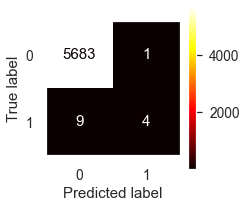

In [87]:
# Confusion Matrix
# print(confusion_matrix(y_test, y_pred_xgb_test)) 
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(fit_svm, x_test, y_test, cmap='hot', normalize=None, ax=ax)
plt.grid(False)

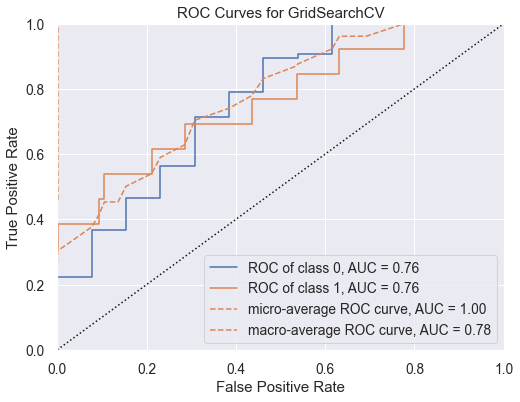

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [88]:
# Area Under Curve
fig, ax = plt.subplots(figsize=(8, 6))
visualizer = ROCAUC(fit_svm, ax)
visualizer.fit(x_train, y_train)                 # Fit the training data to the visualizer
auc_dt = visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                                # Finalize and render the figure